# fSIM speckle processing code (simulation)

In [1]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift

import llops as yp
import arrayfire as af


from IPython import display
import pickle
from fSIM_func_yp import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
af.set_backend('cuda')
af.set_device(0)
af.device_info()

{'device': 'TITAN_Xp', 'backend': 'CUDA', 'toolkit': 'v8', 'compute': '6.1'}

In [3]:
# Loading data
f = open('res_speckle_shift.pckl', 'rb')
pscrop,lambda_f,NA_obj,I_image,Ic_image,pixel_shift_stack,speckle_intensity_shift_crop = pickle.load(f)
f.close()

In [4]:
# Upsampling image
upsamp_factor = 1  # upsampling factor
bg = 100           # background value

I_image_up, Ic_image_up = image_upsampling(I_image, Ic_image, upsamp_factor, bg)


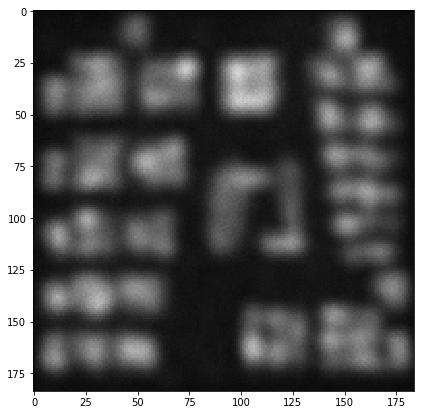

In [5]:
display_image_movie(I_image_up, frame_num=40, size=(7,7), pause_time=0.0001)

Text(0,0.5,'yshift (px)')

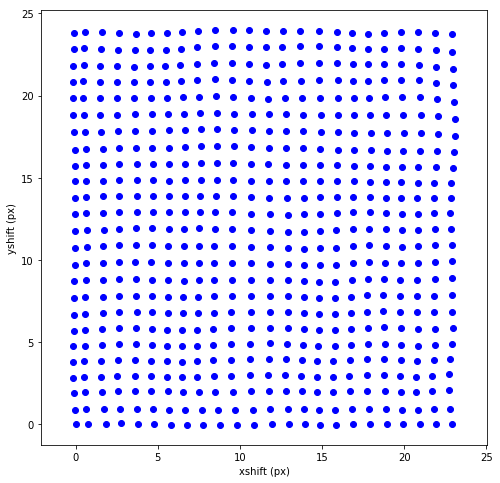

In [6]:
# Image registration to get shift
xshift, yshift = image_registration(Ic_image_up, usfac=100)

plt.figure(figsize=(8,8))
plt.plot(xshift,yshift,'bo')
plt.axis('equal')
plt.xlabel('xshift (px)')
plt.ylabel('yshift (px)')

In [7]:
# Initialize the solver object


fSIM_sol = fSIM_solver(I_image_up, xshift, yshift, 0, lambda_f,\
                       pscrop, upsamp_factor, NA_obj, 0.4, 10, 'arrayfire')

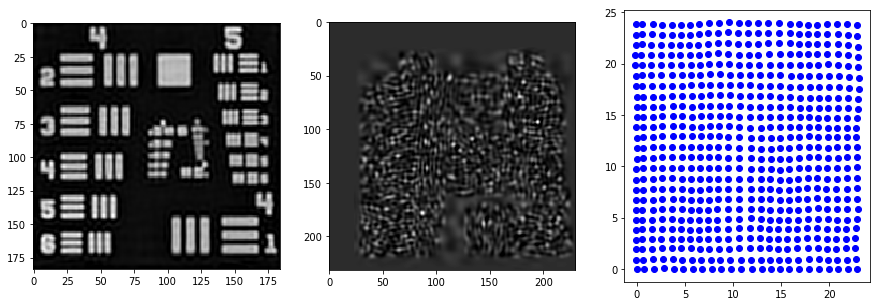

In [8]:
# Run the iterative algorithm
fSIM_sol.iterative_algorithm(I_image_up, 1, 0)